## 전라북도, 160213
## 데이터 전처리
1. 필요없는 컬럼 빼기
2. region_sub 컬럼 원핫인코딩 형식 수정
3. 컬럼별 상관관계 파악 컬럼 제거
4. price_cat 컬럼 추가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'jrb_region'

In [2]:
readD = pd.read_csv(f'region-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160213 entries, 0 to 160212
Columns: 105 entries, region to all_loan
dtypes: float64(72), int64(26), object(7)
memory usage: 128.3+ MB


In [3]:
all_col = {
    'region', 'region_sub', 'apt_name', 'apt_size', 'apt_floor', 'contract_date', 'contract_price',
    'completion_year', 'period_completed', 'pyung', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'price_per_pyung_present', 'contract_date_key', 'index',  'date_ym', 'kospi',
    'kospi200', 'kospi200construct', 'kosdaq', 'dowjones', 's&p500', 'shanghai', 'nikkei',
    'exchange_rate', 'gold', 'oil', 'export', 'import', 'cpi_living', 'cpi', 'ccsi',
    'loan_interest_rate', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [4]:
drop_col_1 = {
    'region', 'apt_name', 'apt_size', 'contract_date', 'contract_price',
    'completion_year', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'contract_date_key', 'index', 'date_ym', 'kospi',
    's&p500', 'nikkei', 'cpi', 'ccsi', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsb_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jj_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [5]:
preD = readD.drop(columns=drop_col_1)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160213 entries, 0 to 160212
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               160213 non-null  object 
 1   apt_floor                160213 non-null  int64  
 2   period_completed         160213 non-null  int64  
 3   pyung                    160213 non-null  float64
 4   price_per_pyung_present  160213 non-null  float64
 5   kospi200                 160213 non-null  float64
 6   kospi200construct        160213 non-null  float64
 7   kosdaq                   160213 non-null  float64
 8   dowjones                 160213 non-null  float64
 9   shanghai                 160213 non-null  float64
 10  exchange_rate            160213 non-null  float64
 11  gold                     160213 non-null  float64
 12  oil                      160213 non-null  float64
 13  export                   160213 non-null  int64  
 14  impo

In [6]:
# test = preD['region_sub'].str.split(expand=True)[0]
# test.value_counts()

preD['region_sub'] = preD['region_sub'].str.split(expand=True)[0]
preD['region_sub'].value_counts()

전주완산구    39478
전주덕진구    35201
익산시      30915
군산시      27894
정읍시       7305
완주군       6602
남원시       4039
김제시       3596
부안군       1799
고창군       1510
임실군        573
무주군        427
진안군        330
순창군        300
장수군        244
Name: region_sub, dtype: int64

In [7]:
drop_col_2 = {
    'gj_pop', 'jrn_pop'
}

preD.drop(columns=drop_col_2, inplace=True)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160213 entries, 0 to 160212
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               160213 non-null  object 
 1   apt_floor                160213 non-null  int64  
 2   period_completed         160213 non-null  int64  
 3   pyung                    160213 non-null  float64
 4   price_per_pyung_present  160213 non-null  float64
 5   kospi200                 160213 non-null  float64
 6   kospi200construct        160213 non-null  float64
 7   kosdaq                   160213 non-null  float64
 8   dowjones                 160213 non-null  float64
 9   shanghai                 160213 non-null  float64
 10  exchange_rate            160213 non-null  float64
 11  gold                     160213 non-null  float64
 12  oil                      160213 non-null  float64
 13  export                   160213 non-null  int64  
 14  impo

In [8]:
corr_matrix = preD.corr()
corr_matrix["price_per_pyung_present"].sort_values(ascending=False)

price_per_pyung_present    1.000000
pyung                      0.342100
apt_floor                  0.296872
jrb_loan                   0.116913
dowjones                   0.113074
cpi_living                 0.106304
ccn_pop                    0.106132
exchange_rate              0.076723
gsn_pop                    0.066596
kosdaq                     0.066005
kospi200                   0.052365
shanghai                   0.046232
gold                       0.039786
jrb_re_ccsi                0.000084
import                    -0.017391
export                    -0.034153
oil                       -0.077012
loan_interest_rate        -0.098676
kospi200construct         -0.108689
jrb_pop                   -0.115822
period_completed          -0.689027
Name: price_per_pyung_present, dtype: float64

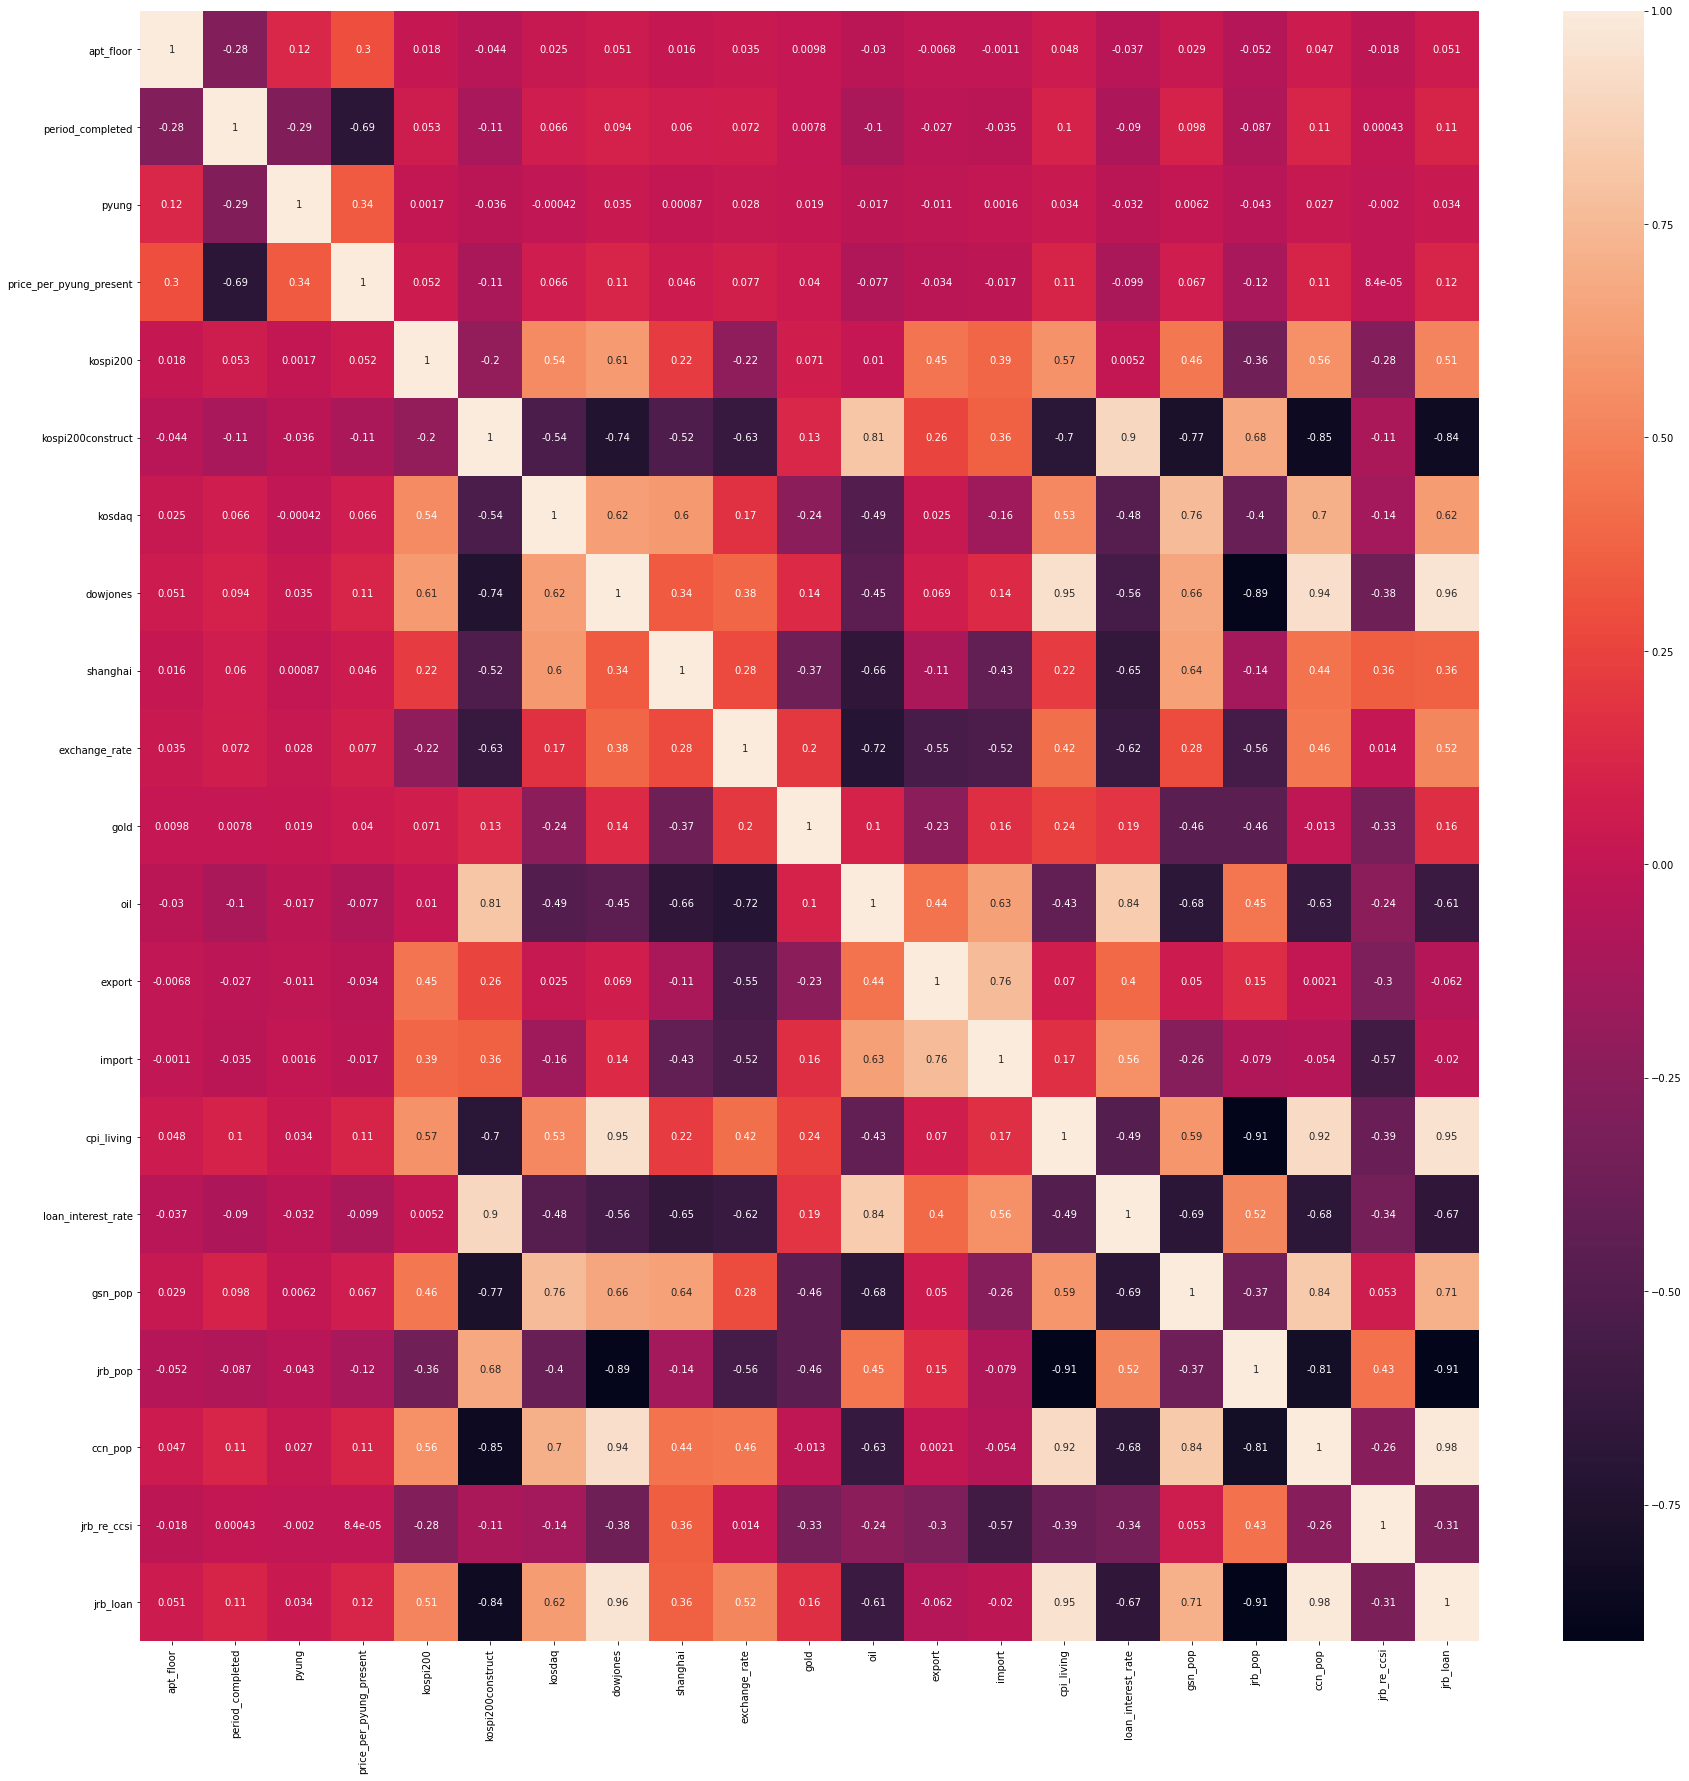

In [9]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()


count    1.602130e+05
mean     6.430237e+06
std      2.586493e+06
min      5.889100e+05
25%      4.502382e+06
50%      6.053496e+06
75%      8.011338e+06
max      2.728884e+07
Name: price_per_pyung_present, dtype: float64


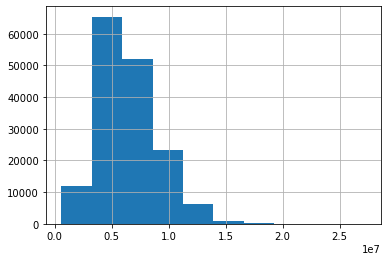

In [10]:
print(preD['price_per_pyung_present'].describe())

preD['price_per_pyung_present'].hist()
plt.show()

In [11]:
preD['price_cat'] = preD['price_per_pyung_present'] / 5.889100e+05  # min
print(preD['price_cat'].describe())

count    160213.000000
mean         10.918879
std           4.392000
min           1.000000
25%           7.645280
50%          10.279153
75%          13.603671
max          46.337872
Name: price_cat, dtype: float64


In [12]:
def calc_price_categorize(D):

    if D['price_cat'] < 7.645280 : # 25%
        D['price_cat'] = 1.0
    elif D['price_cat'] < 10.279153 : # 50%
        D['price_cat'] = 2.0
    elif D['price_cat'] < 13.603671 : # 75%
        D['price_cat'] = 3.0
    else:
        D['price_cat'] = 4.0

    return D
    
preD = preD.apply(calc_price_categorize, axis=1)
preD['price_cat'].value_counts()

4.0    40054
3.0    40054
2.0    40053
1.0    40052
Name: price_cat, dtype: int64

In [13]:
preD.to_csv(f'region-ml-data-files/{region_name}.csv', index=False, encoding='utf-8-sig')

## 기계 학습
1. price_cat 분포별 데이터 나누기
2. train_set, test_set 나누기
3. 스케일 조정
4. 모델별 학습, 테스트
5. 모델 최적화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'jrb_region'

In [2]:
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160213 entries, 0 to 160212
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               160213 non-null  object 
 1   apt_floor                160213 non-null  int64  
 2   period_completed         160213 non-null  int64  
 3   pyung                    160213 non-null  float64
 4   price_per_pyung_present  160213 non-null  float64
 5   kospi200                 160213 non-null  float64
 6   kospi200construct        160213 non-null  float64
 7   kosdaq                   160213 non-null  float64
 8   dowjones                 160213 non-null  float64
 9   shanghai                 160213 non-null  float64
 10  exchange_rate            160213 non-null  float64
 11  gold                     160213 non-null  float64
 12  oil                      160213 non-null  float64
 13  export                   160213 non-null  int64  
 14  impo

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(readD, readD["price_cat"]): # readD['price_cat'] 분포 유지
    train_set = readD.loc[train_idx]
    test_set = readD.loc[test_idx]

In [4]:
train_set['price_cat'].value_counts() / len(train_set)

4.0    0.250007
3.0    0.250007
2.0    0.249998
1.0    0.249989
Name: price_cat, dtype: float64

In [5]:
for set_ in (train_set, test_set):
    set_.drop('price_cat', axis=1, inplace=True)

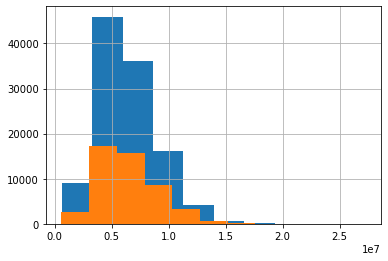

In [6]:
train_set['price_per_pyung_present'].hist()
test_set['price_per_pyung_present'].hist()
plt.show()

In [7]:
x_train = train_set.drop('price_per_pyung_present', axis=1)
y_train = train_set['price_per_pyung_present'].copy()
x_test =  test_set.drop('price_per_pyung_present', axis=1)
y_test = test_set['price_per_pyung_present'].copy()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

num_pipe = Pipeline([
        ('selector', DataFrameSelector(list(x_train)[1:])),
        ('std_scaler', StandardScaler())
    ])

cat_pipe = Pipeline([
        ('selector', DataFrameSelector(['region_sub'])),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

prepro_pipe = FeatureUnion([
        ("num_pipe", num_pipe),
        ("cat_pipe", cat_pipe)
    ])

full_pipe = Pipeline([
        ('prepro', prepro_pipe),
        ("gbr", GradientBoostingRegressor())
    ])

x_train_nor = prepro_pipe.fit_transform(x_train)
# x_test_nor = prepro_pipe.fit_transform(x_test)


In [10]:
x_train_nor[1, :]


array([-1.13258986,  1.24615806, -0.96430355, -0.71614778,  0.34492662,
       -0.23919534, -0.44916821,  0.78477021, -0.48192068, -0.69755718,
       -0.59589363, -0.93088265, -1.43886818, -0.91976187, -0.11158123,
       -0.20870503,  0.7320004 , -0.70165955,  1.40396824, -0.72655695,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gbr__n_estimators': [900],
              'gbr__max_depth': [8]}

grid = GridSearchCV(full_pipe, param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)

print("최상의 교차 검증 정확도: ", grid.best_score_)
print("테스트 세트 점수: ", grid.score(x_test, y_test))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도:  0.9241194977448517
테스트 세트 점수:  0.9303271359325773
최적의 매개변수: {'gbr__max_depth': 8, 'gbr__n_estimators': 900}


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_pred = grid.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid_mae = mean_absolute_error(y_test, test_pred)
print('grid mae: ', grid_mae)

grid rmse:  683980.3405350948
grid mae:  472937.14391968015


In [13]:
grid.cv_results_

{'mean_fit_time': array([301.93055471, 348.00422279, 345.56392463, 388.92695181]),
 'std_fit_time': array([0.90122444, 4.6697904 , 3.81437072, 4.65056875]),
 'mean_score_time': array([0.82512625, 0.91489895, 0.99899944, 1.11336303]),
 'std_score_time': array([0.00820699, 0.01401541, 0.02972099, 0.02328191]),
 'param_gbr__max_depth': masked_array(data=[7, 7, 8, 8],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gbr__n_estimators': masked_array(data=[800, 900, 800, 900],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gbr__max_depth': 7, 'gbr__n_estimators': 800},
  {'gbr__max_depth': 7, 'gbr__n_estimators': 900},
  {'gbr__max_depth': 8, 'gbr__n_estimators': 800},
  {'gbr__max_depth': 8, 'gbr__n_estimators': 900}],
 'split0_test_score': array([0.91955879, 0.92062326, 0.92366304, 0.92351647]),
 'split1_test_score': array([0.91977094, 0.92074566, 0.92324751, 0.92

In [14]:
final_model = grid.best_estimator_
final_model

Pipeline(steps=[('prepro',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['apt_floor',
                                                                                                     'period_completed',
                                                                                                     'pyung',
                                                                                                     'kospi200',
                                                                                                     'kospi200construct',
                                                                                                     'kosdaq',
                                                                                                     'dowjones',
                              

In [15]:
import joblib

joblib.dump(final_model, f'models/{region_name}.pkl')


['models/jrb_region.pkl']

In [16]:
# test model
import joblib

gw_model = joblib.load(f'models/{region_name}.pkl')

test_pred = gw_model.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid rmse:  683980.3405350948
